# Data Modeling in Machine Learning (Classification)

This notebook is part of our tutorial series on **data modeling in machine learning**. It aims to act as a subscript to our tutorial video on the subject (data modeling). This notebook follows the template of which we used in the [regression task](big_mart_check_list.ipynb), so they might almost look identical from the start.

In this notebook, we explore the [Loan Prediction](data/loan_prediction.csv) dataset. This is a classification dataset consisting of thirteen (13) feature columns described below: 

- **Loan_ID**: Unique Loan ID
- **Gender**: Male/ Female
- **Married**: Applicant married (Y/N)
- **Dependents**: Number of dependents
- **Education**: Applicant Education (Graduate/ Under Graduate)
- **Self_Employed**: Self employed (Y/N)
- **ApplicantIncome**: Applicant income
- **CoapplicantIncome**: Coapplicant income
- **LoanAmount**: Loan amount in thousands
- **Loan_Amount_Term**: Term of loan in months
- **Credit_History**: credit history meets guidelines
- **Property_Area**: Urban/ Semi Urban/ Rural
- **Loan_Status**: Loan approved (Y/N)

What we hope to achieve here is to examine the data modeling process on the [Loan Prediction](data/loan_prediction.csv) dataset making use of our data modeling [checklist](data_modelling_checklist.md) described [below](#What-are-the-steps-(checklist)-in-modeling-data?). Before going too far let's understand some concepts before we begin with this tutorial.

- What is data modeling in machine learning?
- Why do we model data in machine learning?
- What are classification tasks?
- What are the steps (checklist) in modeling data?

## What is data modeling in machine learning?

**Data modeling in machine learning** is the process of **creating machine learning models capable of** predicting labels from features, tuning them for the business need, and validating it on holdout data. The output from data modeling is a trained model that can be used for **making predictions on new data points**.

## Why do we model data in machine learning?

We all know that the purpose of machine learning is to create models that mimic understanding of real-world situations through data and apply their understanding to real-world scenarios. We model data to create a bridge (pipeline) between the dataset and the machine learning model, such that new data can be quickly received and translated to results.

## What are classification tasks?

Classification is a task of Machine Learning which assigns a label value to a specific class and then can identify a particular type to be of one kind or another.

Our [Loan Prediction](data/loan_prediction.csv) dataset is a classification task and what we aim to predict is the `Loan_Status` of each person (represented by a `Loan_ID`).

## What are the steps (checklist) in modeling data?

There are four major steps involved in data modeling tasks. These are **data preparation**, **shortlisting promising models**, **fine-tuning the selected systems**, and **finally presenting your solution**.

The full checklist of a data modeling process can be found [here](ml_project_checklist.docx). The checklist was written by [Aurélien Géron](https://www.oreilly.com/people/aurelien-geron/) in his book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/). But the checklist we'll be making use of is more fine-tuned for data modeling alone. 

**📖** I strongly recommend this book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) to everyone new to the field of machine learning.

### Prepare the Data

**Notes:**

- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply, for five reasons:
    - So you can easily prepare the data the next time you get a fresh dataset
    - So you can apply these transformations in future projects
    - To clean and prepare the test set
    - To clean and prepare new data instances once your solution is live
    - To make it easy to treat your preparation choices as hyperparameters

1. **Data cleaning**:
    - Fix or remove outliers (optional).
    - Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).
    
2. **Feature selection (optional)**:
    - Drop the attributes that provide no useful information for the task.
    
3. **Feature engineering, where appropriate**:
    - Discretize continuous features.
    - Decompose features (e.g., categorical, date/time, etc.).
    - Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
    - Aggregate features into promising new features.

4. **Feature scaling**:
    - Standardize or normalize features.

### Shortlist Promising Models

**Notes:**

- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
- Once again, try to automate these steps as much as possible.

1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
    - For each model, use N -fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make.
    - What data would a human have used to avoid these errors?
5. Perform a quick round of feature selection and engineering.
6. Perform one or two more quick iterations of the five previous steps.
7. Shortlist the top three to five most promising models, preferring models that make different types of errors.

### Fine-Tune the System

**Notes:**

- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
- As always, automate what you can.

1. Fine-tune the hyperparameters using cross-validation:
    - Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
    - Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al. ).
2. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

### Present Your Solution

1. Document what you have done.
2. Create a nice presentation.
    - Make sure you highlight the big picture first.
3. Explain why your solution achieves the business objective.
4. Don’t forget to present interesting points you noticed along the way.
    - Describe what worked and what did not.
    - List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

### Side Note

There are a couple of things I want to point out before we begin. The emojis represented in black quotes stand for different things entirely.

**⁉** stand for research or reason finding. At any point you encounter this emoji, you're expected to answer the question and get the intuition behind it.

**🛠** stands for activities. The activities described here are all to be compiled and submitted to the class telegram page.

**📖** stands for resources. You're expected to follow up on every resource provided in this notebook to aid you in better understanding the task. I would be joking to tell you one single notebook would help you grasp the entirety of data modeling in machine learning.

Now that we've explained all of the steps, let's proceed to mark our checklist 😊. 

In [1]:
import numpy as np
import pandas as pd

Let's import our dataset as `loan_dataset`

In [2]:
loan_dataset = pd.read_csv("data/loan_prediction.csv", index_col='Loan_ID')
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We then proceed to using the `.info` method to find out more about the dataset

In [3]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


#### Prepare the data
---

From our checklist, the first thing we have to do is **prepare the data**. We start by cleaning the data by filling the missing values in the dataset.

After inspecting the dataset, we can tell there are 7 missing feature columns. `["Gender", "Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"]`.

Since the dataset deals with information of applicants who applied for loans, feature columns like `Gender`, `Married`, `Dependents`, and `Self_Employed` are relevant, but can't actually be strategically filled since none of the other feature columns provides us with information on how we might be able to fill them. So we would apply a simple forward fill on these columns (these are after inspecting the uniqueness of these columns).

In [4]:
for col in ["Gender", "Married", "Dependents", "Self_Employed"]:
    print(col, loan_dataset[col].unique(), sep=" || ", end="\n\n")

Gender || ['Male' 'Female' nan]

Married || ['No' 'Yes' nan]

Dependents || ['0' '1' '2' '3+' nan]

Self_Employed || ['No' 'Yes' nan]



What we tried doing earlier is ensuring there is no false duplicate across the feature columns, like Male and male, or Yes and yes. Now that we've confirmed that, we can proceed to fill the columns and inspect the changes.

In [5]:
for col in ["Gender", "Married", "Dependents", "Self_Employed"]:
    loan_dataset[col].ffill(inplace=True)
    print(col, loan_dataset[col].unique(), sep=" || ", end="\n\n")

Gender || ['Male' 'Female']

Married || ['No' 'Yes']

Dependents || ['0' '1' '2' '3+']

Self_Employed || ['No' 'Yes']



Beautiful! Now that we've addressed these columns, we can now work on the columns `["LoanAmount", "Loan_Amount_Term", "Credit_History"]`. 

We could head straight to applying a forward fill, but we suspect there would be some sort of relationship between the columns `LoanAmount` and `ApplicantIncome`, so we want to first check out that relationship. The alternative if there is no relationship is to apply the mean to fill the missing columns.

The `Loan_Amount_Term` falls in a range of 60's (i.e. 60, 120, 180, 240, 300, 360), with 12 and 36. Therefore, applying mean isn't an option. Forward filling might work but we also wish to see if there are relationships between `Loan_Amount_Term` and `ApplicantIncome`.

Like the `Loan_Amount_Term`, for the `Credit_History` forward filling might work but we also wish to see if there are relationships between `Credit_History` and `ApplicantIncome`.

In [6]:
# In order to plot the relationship, we have to eliminate 
# the nan values in the columns 
# ["LoanAmount", "Loan_Amount_Term", "Credit_History"]

loan_dataset_copy = loan_dataset.copy()

loan_dataset_copy.Credit_History.ffill(inplace=True)
loan_dataset_copy.Loan_Amount_Term.ffill(inplace=True)
loan_dataset_copy.LoanAmount = loan_dataset_copy.LoanAmount.map(
    lambda x: loan_dataset_copy.LoanAmount.mean() if x is None else x
)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(rc={'figure.figsize':(12,5)})

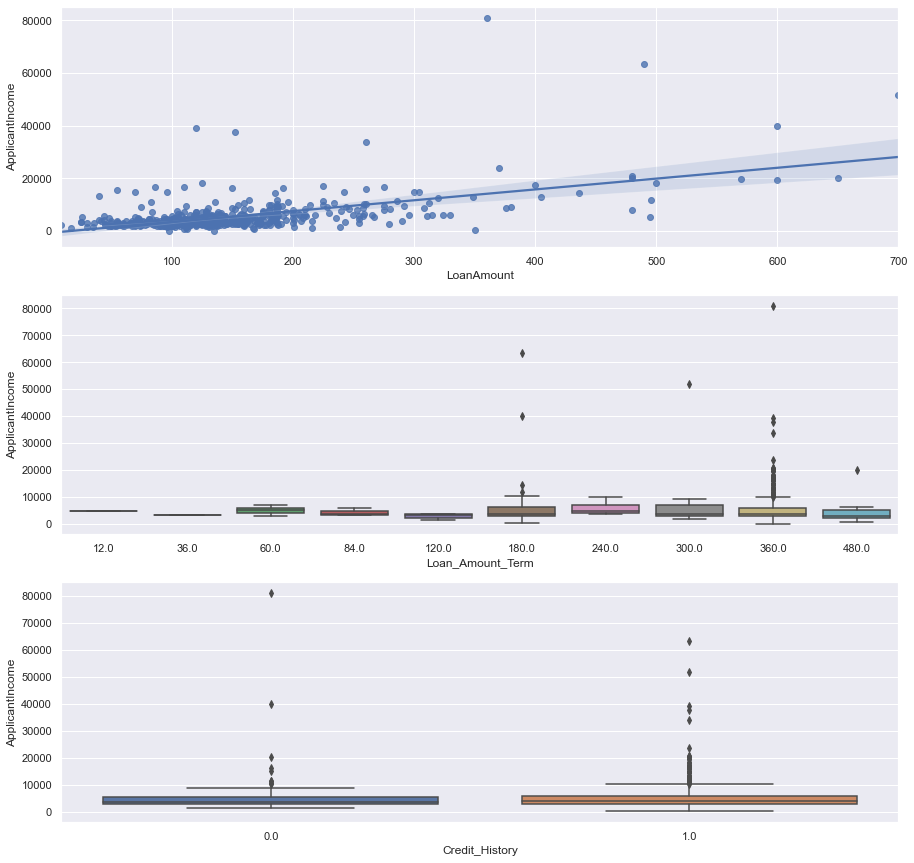

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for ax, col in zip(axes, ["LoanAmount", "Loan_Amount_Term", "Credit_History"]):
    if col == "LoanAmount":
        sns.regplot(x=col, y="ApplicantIncome", data=loan_dataset_copy, ax=ax);
    else:
        sns.boxplot(x=col, y="ApplicantIncome", data=loan_dataset_copy, ax=ax);

del loan_dataset_copy

We can see from the graphs above that there's a linear relationship between the `LoanAmount` and the `ApplicantIncome`. We can therefore create a linear regression model to fill the missing values based on this relationship.

But there are no relationships as far as we can tell between the `ApplicantIncome` and both the `Loan_Amount_Term` and `Credit_History` feature columns, so we would proceed to perform a forward fill on the `Loan_Amount_Term` and `Credit_History` feature columns.

In [9]:
for col in ["Loan_Amount_Term", "Credit_History"]:
    loan_dataset[col].ffill(inplace=True)
    print(col, loan_dataset[col].unique(), sep=" || ", end="\n\n")

Loan_Amount_Term || [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]

Credit_History || [1. 0.]



Let's create a linear regression model to help understand this relationship. We'll start by separating a missing values from the present once.

In [10]:
applicant_income = loan_dataset.ApplicantIncome
loan_amount = loan_dataset.LoanAmount

In [11]:
X_train, y_train = (
    applicant_income[loan_amount.notnull()].to_numpy().reshape(-1, 1), 
    loan_amount[loan_amount.notnull()].to_numpy().reshape(-1, 1)
)

missing_loan_amount = loan_amount[loan_amount.isnull()]
missing_applicant_income = applicant_income[loan_amount.isnull()]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
loan_amount_filler = LinearRegression()

In [14]:
loan_amount_filler.fit(X_train, y_train)

LinearRegression()

In [15]:
predictions = loan_amount_filler.predict(missing_applicant_income.to_numpy().reshape(-1, 1))

In [16]:
loan_dataset.LoanAmount[loan_dataset.LoanAmount.isnull()] = np.round(np.squeeze(predictions))

<ipython-input-16-b9ad45078ae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.LoanAmount[loan_dataset.LoanAmount.isnull()] = np.round(np.squeeze(predictions))


In [17]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 78.5+ KB


We've successfully cleaned the dataset ✔

#### Feature Selection
---

The next thing on our checklist is **feature selection**, which deals with excluding attributes (feature columns) that provide little to no useful information for the task. 

We could manually handle this by hand picking feature columns that we consider irrelevant to the dataset, but we would try something different here.

We know that the random forest is an ensemble of decision trees, in each decision tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision on how to divide the data set into two separate sets with similars responses within. This gives the tree the ability to measure feature importance.

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

We would be making use of the decision tree classifier to measure the feature importance of each feature column. 

We'll start by converting all the category feature columns (`["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]`) to numbers, and then separate the column `Loan_Status` from the rest of the data to form the target.

In [18]:
loan_dataset_copy = loan_dataset.copy()

In [19]:
# Asjusting the Gender feature column
loan_dataset_copy.Gender.replace({
    "Male": 1,
    "Female": 0,
}, inplace=True)

# Asjusting the Married feature column
loan_dataset_copy.Married.replace({
    "Yes": 1,
    "No": 0,
}, inplace=True)

# Asjusting the Dependents feature column
loan_dataset_copy.Dependents.replace({
    "0": 0,
    "1": 1,
    "2": 2,
    "3+": 3,
}, inplace=True)

# Asjusting the Education feature column
loan_dataset_copy.Education.replace({
    "Not Graduate": 1,
    "Graduate": 0,
}, inplace=True)

# Asjusting the Self_Employed feature column
loan_dataset_copy.Self_Employed.replace({
    "Yes": 1,
    "No": 0,
}, inplace=True)

# Asjusting the Property_Area feature column
loan_dataset_copy.Property_Area.replace({
    "Rural": 0,
    "Semiurban": 1,
    "Urban": 2,
}, inplace=True)

# Asjusting the Loan_Status feature column
loan_dataset_copy.Loan_Status.replace({
    "Yes": 1,
    "No": 0,
}, inplace=True)

In [20]:
target = loan_dataset_copy.Loan_Status
data = loan_dataset_copy.drop('Loan_Status', axis=1)

In [21]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,150.0,360.0,1.0,2
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
decision_tree_clf = DecisionTreeClassifier()

In [24]:
decision_tree_clf.fit(data, target)

DecisionTreeClassifier()

In [25]:
# Previewing the features and their importance

for col, fi in zip(loan_dataset_copy, decision_tree_clf.feature_importances_):
    print(col, round(fi * 100, 2), sep=" | ")

Gender | 2.41
Married | 1.3
Dependents | 6.99
Education | 2.3
Self_Employed | 2.32
ApplicantIncome | 23.82
CoapplicantIncome | 9.8
LoanAmount | 16.46
Loan_Amount_Term | 4.35
Credit_History | 27.58
Property_Area | 2.67


In [26]:
# Previwing the features and their importance in the order of their importance

for fi, col in sorted(zip(decision_tree_clf.feature_importances_, loan_dataset_copy), reverse=True):
    print(col, round(fi * 100, 2), sep=" | ")

Credit_History | 27.58
ApplicantIncome | 23.82
LoanAmount | 16.46
CoapplicantIncome | 9.8
Dependents | 6.99
Loan_Amount_Term | 4.35
Property_Area | 2.67
Gender | 2.41
Self_Employed | 2.32
Education | 2.3
Married | 1.3


> **🛠**: Using graphviz, visualize this decision tree to see what is going on behind the scene.

If you summed up the importance of each feature to the predicted outcome, we would get a total of 100, implying the importance of each feature is spread in the percentage of the importance of the feature; from the most important to the least important.

So three (3) of the most important features to our dataset are the `Credit_History`, `ApplicantIncome`, and `LoanAmount`. the two least relevant features are `Gender` and `Married` features. With these facts, we can make decisions on the kind of features we want to make use of.

For this tutorial, we would be dropping the least most important features which are the `Gender` and `Married` features.

In [27]:
loan_dataset.drop(['Gender', 'Married'], axis=1, inplace=True)

We'll therefore skip both the **feature selection**. ✔

#### Feature Engineering
---

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Some of the means of feature engineering as listed from our checklist are:

- Discretize continuous features.
- Decompose features (e.g., categorical, date/time, etc.).
- Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
- Aggregate features into promising new features.

There is no need to discretize continuous feature columns because none of the feature columns are best suited for discretization, there is no feature column we can decompose, there are no transformations we can apply to improve the data and there is no need to aggregate the features into a new feature.

> **📖** Feature engineering is a very important topic as it helps in reducing the dimension of the dataset while improving the chances of the dataset being accurate when applied to a model. I recommend this article [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114) by [Emre Rençberoğlu](https://medium.com/@emrerencberoglu) for better enlightenment on the various feature engineering techniques.

A bit of what we did during our feature selection process was engineering the features to suit the needs of the machine learning model. We could apply that same method here but we'll be trying something different, even though the first approach is recommended for simplicity.

Scikit-Learn has provided a couple of algorithms for us to achieve this. These algorithms include the label, ordinal, and one hot encoder. Let's start by defining the various encoders and how they function.

##### **Label Encoders**

Label Encoding is an encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering. 

![Label Encoding](images/label_encoding.png)

Label encoders do not take categorical order into consideration, and this is the reason why we have ordinal encoders

##### **Ordinal Encoders**

Ordinal Encoding like label encoding is an encoding technique for handling categorical variables. In this technique, each unique category value is assigned an integer value. For example, red is 1, green is 2, and blue is 3.

![Ordinal Encoding](images/ordinal_encoding.png)

Ordinal encoders take categorical order into consideration which is good for categorical variables that has order like Big, Medium, Small

##### **One-Hot Encoders**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. 

![One Hot Encoding](images/ohe.jpg)

This form converts a categorical feature column to a series of columns stating if the category is present (1) or absent (0) in the new set of feature columns. Label encoders do not take categorical order into consideration, and this is the reason why we have ordinal encoders.

There are five (5) categorical columns in our dataset (after feature selection). These columns are `Dependents`, `Education`, `Self_Employed`, `Credit_History`, and `Property_Area`. We'll have to look through them to decide on what encoder best suits a feature column.

In [28]:
categorical_columns = [
    'Dependents', 'Education', 'Self_Employed', 
    'Credit_History', 'Property_Area'
]

One of the best ways to decide on the kind of encoder to make use of is by knowing the number of unique categories belonging to a feature column.

The **rule of thumb** I make use of is making use of one-hot encoding for categories of 2 & 3 value, ordinal encoding for categories between 2-7 values with a certain order between them, and label encoding for every other.

In [29]:
for col in categorical_columns:
    values = loan_dataset[col].unique()
    
    print(
        col, 
        values if len(values) in range(10) else values[:10], 
        len(values), 
        sep=" | ", end="\n\n"
    )

Dependents | ['0' '1' '2' '3+'] | 4

Education | ['Graduate' 'Not Graduate'] | 2

Self_Employed | ['No' 'Yes'] | 2

Credit_History | [1. 0.] | 2

Property_Area | ['Urban' 'Rural' 'Semiurban'] | 3



There is no order between the columns `Education`, `Self_Employed`, and `Credit_History`. But there is an order between the columns `Dependents` and `Property_Area`.

We would be making use of the `sklearn.compose.ColumnTransformer` to perform a transformation on these columns as we as scaling the continuous feature columns in the dataset.

The Scikit-Learn Column-Transformer applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. We would be applying the ordinal encoders to the various categorical columns.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [31]:
categorical_columns += ['Loan_Status']
non_categorical_columns = [
    col 
    for col in loan_dataset.columns 
    if col not in categorical_columns
]

In [32]:
transformer = ColumnTransformer([
    ('others_cols', 'passthrough', non_categorical_columns),
    ('categorical_col', OrdinalEncoder(), categorical_columns)
])

In [33]:
data = transformer.fit_transform(loan_dataset)

In [34]:
loan_dataset = pd.DataFrame(
    data, 
    columns=non_categorical_columns + categorical_columns, 
    index=loan_dataset.index
)

In [35]:
loan_dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,
LP001002,5849.0,0.0,150.0,360.0,0.0,0.0,0.0,1.0,2.0,1.0
LP001003,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0,0.0,0.0
LP001005,3000.0,0.0,66.0,360.0,0.0,0.0,1.0,1.0,2.0,1.0
LP001006,2583.0,2358.0,120.0,360.0,0.0,1.0,0.0,1.0,2.0,1.0
LP001008,6000.0,0.0,141.0,360.0,0.0,0.0,0.0,1.0,2.0,1.0


So that's it for **feature engineering**. ✔

#### Feature Scaling
---

Next is the feature scaling. **Feature scaling** is a method used to normalize the range of independent variables or features of data. There would be no need to scale any of the feature columns, so leaving them as they are is perfect.

We'll therefore skip the feature scaling. ✔

> **🛠**: Create a pipeline using scikit-learn, that translates the dataset from its initial form when we read it into memory to the current form we have now. (Tips: remember to apply linear regression to fill the missing loan amounts and make use of the ColumnTransformer. Also instead of making use of the forward fill, use the scikit-learn imputer `sklearn.impute.SimpleImputer`)

Next on our checklist is Shortlisting a model; But before we proceed to that, we'll then address the data and its target. The `Loan_Status` column is what we hope to predict.

In [36]:
target_column = 'Loan_Status'

target = loan_dataset[target_column]
data = loan_dataset.drop(target_column, axis=1)

Now that we've successfully addressed our dataset (by splitting it into the data and target). We then proceed to split the data into the train, dev (cross-validation), and test set.

To split the dataset, we would be making use of the SciKit-Learn `train_test_split` function. The dataset has 614 rows, having about 114 rows for testing, and 600 rows for training is good enough. So let's proceed to split the dataset.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.1857, random_state=42)

In [39]:
y_train.shape, y_test.shape

((499,), (115,))

#### Shortlisting Promising Models
---

We have 499 training data and 115 testing data. With that set in place, we can thus proceed to shortlisting models for our experiment. We would be electing four (4) models which would be:

1. Logistic Regression
2. Random Forest Classifier
3. KNN Classifier
4. Support Vector Classifier
5. XGBoost Classifier
6. Decision Tree Classifier

In [40]:
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

> **📖**: Now that we've shortlisted these models, we'll be performing a series of actions to check for the model performance before we select a model for our task. The process is called Model Selection. I wrote an article on the [Steps Involved in Selecting a Model](https://gmolalekan.medium.com/steps-involved-in-selecting-a-model-model-selection-bd7aaffbec4f) which should better explain most of what I did below.

In [41]:
import time, pickle

from sklearn.model_selection import cross_val_score

In [42]:
def perform_model_evaluation(
    verbose=True, time_tracker=True, peep_on_performance=True, 
    save_progress=True, progress_on_record=None, **kwargs
):
    """
    Performs evaluation on the various imputed models
    
    This is a pretty large function tarloyed to this
    task. 
    
    It has a bunch of parameters to help monitor
    the activities going on within the function
    
    verbose: Gives us details about the steps we are 
            on and the progress we're making. If True
    time_tracker: Tracks the time each model evaluation
            takes. If True
    peep_on_performance: Presents model performance at
            certain stages. If True
    save_progress: Saves the progress on evaluation to
            data/record.p at the end of each model evaluation.
            If True
    progress_on_record: Takes an already made progress
            and proceeds from that. If provided.
            File location in str needs to be provided.
    **kwargs: Other variables which would be essential
            to the operation of the function. They
            include: model_names, X_train, X_val,
                y_train, y_val, models, param_grid
    """
    
    # Variables downloading
    model_names = kwargs['model_names']
    X_train = kwargs['X_train']
    y_train = kwargs['y_train']
    models = kwargs['models']
    
    # Subroutine for time tracking
    def cal_time_in_mins(start, _end, process, sep=",", end=f"\n{'+'*120}\n\n"):
        if time_tracker:
            total_time_in_sec = round(_end - start)
            mins = total_time_in_sec // 60
            sec = total_time_in_sec % 60
            print(f"{process} ran for: {mins} mins, {sec} sec", sep=sep, end=end)
            
    # Subroutine for verbose messages
    def verbose_message(message, sep=",", end=f"\n{'-'*120}\n\n"):
        if verbose:
            print(message, sep=sep, end=end)
    
    # Subroutine to save progress
    def preform_progress_saving(r):
        if save_progress:
            pickle.dump(r, open("data/record_c.p", 'wb'))
    
    # Wrapper for estimating the time for a process
    def time_estimator_wrapper(function):
        
        def wrapper(*args):
            start = time.time()
            results = function(*args)
            end = time.time()
            
            cal_time_in_mins(start, end, "Performance Process")

            return results
        
        return wrapper
    
    # Function to perform cross validation
    @time_estimator_wrapper
    def perform_cross_val(_m, message):
        cv_scores = cross_val_score(
            _m(), X_train, y_train,  cv=5, n_jobs=-1,
            scoring='accuracy'
        )
        
        verbose_message(message)
        
        return cv_scores, cv_scores.mean()
    
    # Initializes record
    if progress_on_record is None:
        record = {name: {} for name in model_names}
        verbose_message("Initialized a new record")
    else:
        record = pickle.load(open(progress_on_record, 'rb'))
        verbose_message("Initialized existing record")
    
    verbose_message("Starting the models evaluation")
    
    overall_program_start = time.time()
    
    # Proceeding with model evaluations
    for name, model in zip(model_names, models):
        if not bool(record[name]):
            cvs, cvsm = perform_cross_val(
                model,
                f"Done performing cross validation for {name}"
            )

            if peep_on_performance:
                print("Model Performance", name, cvsm, end=f"\n{'*'*120}\n\n")

            record[name]['cross val score'] = cvs
            record[name]['cross val score mean'] = cvsm

            preform_progress_saving(record)
    
    overall_program_end = time.time()
    
    cal_time_in_mins(overall_program_start, overall_program_end, "Program time")
    
    preform_progress_saving(record)
    
    return record

> **⁉**: In our function above, we excluded making use of the grid search cross-validation. Why do you think we did this?

> **🛠**: From our regression task, you were asked to convert the function above to its OOP equivalent. This time adjust your configurations to be able to cross-validate for both regression and classification tasks. (Tips: apply `neg_mean_absolute_error` scoring for regression tasks and `accuracy` scoring for classification tasks) (Advanced: create an algorithm that can automatically determine a regression from a classification task)

In [43]:
models = [
    LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, 
    SVC, RandomForestClassifier, XGBClassifier
]

In [44]:
model_names = [
    'Logistic Regression', 'K-Neighbor Classifier', 'Decision Tree Classifier', 
    'Support Vector Classifier', 'Random Forest Classifier', 'XGBoost Classifier'
]

In [45]:
record = perform_model_evaluation(
    X_train=X_train, y_train=y_train, 
    models=models, model_names=model_names
)

Initialized a new record
------------------------------------------------------------------------------------------------------------------------

Starting the models evaluation
------------------------------------------------------------------------------------------------------------------------

Done performing cross validation for Logistic Regression
------------------------------------------------------------------------------------------------------------------------

Performance Process ran for: 0 mins, 8 sec
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Model Performance Logistic Regression 0.8055353535353534
************************************************************************************************************************

Done performing cross validation for K-Neighbor Classifier
----------------------------------------------------------------------------------------------------------------------

In [46]:
# Uncomment the code below if you already 
# started the program but stopped for a reason.

# record = perform_model_evaluation(
#     X_train=X_train,y_train=y_train,
#     models=models, model_names=model_names,
#     progress_on_record="data/record_c.p"
# )

After the overview, two models performed best first is the logistic regression, having an average accuracy score of approximately 81%, and the random forest classifier, having an average accuracy score of approximately 79%.

Let's proceed to find out more about the model performance on each fold

In [47]:
for r in record:
    print(r, record[r], sep=" | ", end="\n\n")

Logistic Regression | {'cross val score': array([0.82      , 0.82      , 0.82      , 0.8       , 0.76767677]), 'cross val score mean': 0.8055353535353534}

K-Neighbor Classifier | {'cross val score': array([0.56      , 0.63      , 0.65      , 0.66      , 0.68686869]), 'cross val score mean': 0.6373737373737374}

Decision Tree Classifier | {'cross val score': array([0.69      , 0.73      , 0.7       , 0.75      , 0.74747475]), 'cross val score mean': 0.7234949494949495}

Support Vector Classifier | {'cross val score': array([0.7      , 0.69     , 0.69     , 0.7      , 0.6969697]), 'cross val score mean': 0.6953939393939395}

Random Forest Classifier | {'cross val score': array([0.84      , 0.8       , 0.77      , 0.8       , 0.77777778]), 'cross val score mean': 0.7975555555555556}

XGBoost Classifier | {'cross val score': array([0.72      , 0.77      , 0.71      , 0.73      , 0.76767677]), 'cross val score mean': 0.7395353535353536}



The logistic regression model has a fluid performance across each fold (except the last fold) which tips it to be the best model and it generalizes well. The random forest model also did its best but falls second to the logistic regression.

Therefore, we'll be selecting the logistic regression and random forest classifier models. ✔

Let's not get too ahead of ourselves; we haven't talked about the various classification metrics that sklearn provides. We'll be looking into the four (4) main classification metrics:

1. Accuracy
2. Precision
3. Recall
4. F1 score

##### **Confusion Matrix**

In order to fully understand how these metrics work we need to understand what a confusion matrix is: A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

<p style="text-align: center"><img alt="Confusion Matrix" src="images/confusion_matrix.png" /></p>

The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing. From the diagram above we can see the structure the predicted value assumes to depict the model's understanding (or misunderstanding) of the data (what we refer to as the confusion matrix).

**The terminologies**:

- TP (True Positive): depict the actual positive values that the model predicted to be positive.
- TN (True Negative): depict the actual negative values that the model predicted to be negative.
- FP (False Positive): depict the actual positive values that the model predicted to be negative.
- FN (False Negative): depict the actual negative values that the model predicted to be positive.

In a confusion matrix, we hope to maximize the TP and TN while minimizing the FP and FN. Therefore the more TP and TN we can craft from the data, the better our model performance will be.

> **⁉**: What do we say about a model where there are no (zero) FP and FN?

It is by these measures we deduce the metrics accuracy, precision, recall, and f1.

> **📖**: When running a proper check to see the model's performance on a classification task, it is proper to understand what these metrics do and which would best address the task. [Koo Ping Shung](https://medium.com/@koolanalytics) explained the function of each metric in his article [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9).


Let's give an overview of the various classification metrics below.

##### **Accuracy**

**What is Accuracy?** Simply put. Accuracy is the fraction of predictions our model got right. It is depicted by the formula ($\frac{TP + TN}{TP + TN + FP + FN}$) which is the fraction of the sum of the True Positive and the True Negative over the sum of the total prediction values (the whole dataset).

##### **Precision**

**What is Precision?** Precision is the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions.

<p style="text-align: center"><img alt="Precision" src="images/precision.png" /></p>

##### **Recall**

**What is Recall?** The recall is the measure of our model correctly identifying True Positives. It is also referred to as sensitivity or True Positive Rate (TPR). The recall focuses on how much of the actual positive data were rightly predicted.

<p style="text-align: center"><img alt="Recall" src="images/recall.png" /></p>

> **📖**: There is a trade-off that exists better the recall and the precision, in that the Recall rate is inversely proportional to the Precision rate. I wrote on the subject on [my kaggle page](https://www.kaggle.com/ganiyuolalekan) on the [Precision-Recall Trade-off](https://www.kaggle.com/ganiyuolalekan/precision-recall-trade-off). It is this balance that the F1 score tries to convey.

##### **F1 Score**

**What is the F1 Score?** The F1 score as a metric conveys the balance between precision and recall. F1 Score is needed when you want to seek a balance between Precision and Recall.

<p style="text-align: center"><img alt="F1 Score" src="images/f1_score.png" /></p>

> **🛠**: We'll be making use of the accuracy metric for this notebook. On your own try evaluating the model on the other classification metrics to document your observations.

#### Fine-Tuning The Model
---

We'll be combining both the logistic regression and random forest model to create a new model (a voting classifier) for this task in our attempt to create a fine-tuned model.

If you had performed the class activity from the regression class, you would be familiar with the voting regressor. Since we would be combining two (2) models, we would have to fine-tune both models to see how they can be improved. There are 2 ways we can do this:

1. We could fine-tune each model individually and combine them to create a new voting classifier
2. we could create a voting classifier model and fine-tune the hyper-parameters of the voting classifier.

We would use the second technique, we'll start by creating a voting classifier combining both the logistic regression and random forest model, and then fine-tune that model.

In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
model = VotingClassifier(
    estimators=[('lr', LogisticRegression(max_iter=1000)), ('rfc', RandomForestClassifier())],
    voting='soft'
)

In [50]:
scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
scores

array([0.82      , 0.82      , 0.81      , 0.79      , 0.76767677])

In [51]:
scores.mean()

0.8015353535353535

Performing simple cross-validation on the model, we can see that it performs almost as well as the logistic regression model and slightly better than the random forest model. Makes sense for us to see something like this as the model is combining the performance of both models.

Let's head on to properly searching out hyper-parameters for the model. Before fine-tuning a model it is essential to know a lot about the model hyper-parameters. Knowing that would be extremely essential to determining the values of hyper-parameter by hand, or those that should be filtered to get the best result using a grid search.

We would be looking at the hyper-parameters of both the logistic regression and random forest classifier.

##### **Logistic Regression**

Logistic regression does not really have any critical hyper-parameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solvers). Regularization (penalty) can sometimes be helpful.

- `max_iter`: is the maximum number of iterations the model can perform before convergence.
- `solver`: is the algorithm to use for optimization by convergence monitoring.
- `C`: controls the penalty strength, which can also be effective.
- `penalty`: regularization penalty.

We would set the value of `1000` for the `max_iter` since it doesn't need to be a very large value. Just one that the model would have most likely converged before reaching. We would also try the different kinds of solvers, control penalties, and regularization penalties that we could in accordance with the [Scikit-Learn API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

##### **Random Forest Classifier**

Random Forest is nothing but a bagged version of decision trees. What this means (implies), is that random forest is an ensemble (collection) of decision tree models merged together to make predictions on data. Random forest achieves a lower test error solely by variance reduction. Therefore increasing the number of trees in the ensemble won't have any effect on the bias of the model. The higher number of trees will only reduce the variance of your model.

Let's look into the various hyper-parameter considerations, tips and tricks of the random forest models. 

> **📖**: I would be taking my notes directly from [z_ai](https://z-ai.medium.com/) in their article [Random Forest: Hyperparameters and how to fine-tune them](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d).

- The **Nº of Decision Trees** in the forest (in Scikit-learn this parameter is called n_estimators)
- The **criteria** with which to split on each node (Gini or Entropy for a classification task, or the MSE or MAE for regression)
- The **maximum depth** of the individual trees. The larger an individual tree, the more chance it has of overfitting the training data, however, as in Random Forests we have many individual trees, this is not such a big problem.
- The **minimum samples** to split on at an internal node of the trees. Playing with this parameter and the previous one we could regularise the individual trees if needed.
- **The maximum number of leaf nodes**. In Random Forest this is not so important, but in an individual Decision Tree, it can greatly help reduce over-fitting as well and also help increase the explainability of the tree by reducing the possible number of paths to leaf nodes. Learn how to use Decision Trees to build explainable ML models here.
- **The number of random features** to include at each node for splitting.
- **The size of the bootstrapped dataset** to train each Decision Tree with.

Fine-tuning the **number of trees** (Nº of Decision Trees) is unnecessary because the secret to selecting a precise number of estimators is by evaluating the dataset to estimate the number of trees that would create a robust model with less variance and low cost of training time. Given our data size, I would an estimators of the value `50` is good enough, knowing that the overall dataset isn't so large

For the criterion, the would make use of grid search to decide between `gini`, and `entropy`. We try this because fine tuning the split criteria could lead to different forests.

Increasing the depth of individual trees increases the possible number of feature/value combinations that are taken into account. The deeper the tree, the more splits it has and the more information about the data it takes into account. It may not be prone to over-fitting because it's an ensemble model but it is still possible to have large depth values. Picking values within the **range of 4 to 7** should be adequate for the model.

The number of random features to consider at each split is one of the most important hyper-parameters to tune in a Random Forest ensemble. Since we're working on a regression task we would be using the values `[None, sqrt, .2, .3, .4]` to allow the random forest to take all the features of your data, 20%, 30%, and 40% of variables in individual split respectively.

Let's try out these values in a grid search and measure how much our model would evolve on the dataset.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    # Logistic Regression hyper-parameters
    'lr__max_iter': [1000],
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'lr__C': [100, 10, 1.0, 0.1, 0.01],
    
    # Random Forest Classifier hyper-parameters
    'rfc__n_estimators': [50],
    'rfc__max_depth': range(4, 8),
    'rfc__max_features': [None, 'sqrt', .2, .3, .4]
}

In [54]:
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

In [55]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


C:\Users\ganiy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80353535 0.80353535 0.80353535 ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('rfc',
                                                     RandomForestClassifier())],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'lr__C': [100, 10, 1.0, 0.1, 0.01],
                         'lr__max_iter': [1000],
                         'lr__penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                        'sag', 'saga'],
                         'rfc__max_depth': range(4, 8),
                         'rfc__max_features': [None, 'sqrt', 0.2, 0.3, 0.4],
                         'rfc__n_estimators': [50]},
             scoring='accuracy', verbose=3)

> **Note**: I could afford to do this because our dataset is very small the models process pretty quickly. DO NOT attempt this on larger dataset, it wouldn't be funny 😅.

In [56]:
grid_search.best_params_

{'lr__C': 10,
 'lr__max_iter': 1000,
 'lr__penalty': 'l2',
 'lr__solver': 'lbfgs',
 'rfc__max_depth': 6,
 'rfc__max_features': None,
 'rfc__n_estimators': 50}

In [57]:
final_model = grid_search.best_estimator_

In [58]:
scores = cross_val_score(final_model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
scores

array([0.83      , 0.82      , 0.81      , 0.8       , 0.76767677])

In [59]:
scores.mean()

0.8055353535353534

Alright, there doesn't seem to be much of a difference; so let's try out our final model on the test data.

In [60]:
final_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, max_iter=1000)),
                             ('rfc',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=None,
                                                     n_estimators=50))],
                 voting='soft')

In [61]:
predictions = final_model.predict(X_test)

We'll be evaluating the model's final performance across the accuracy, precision, and recall metrics to see the accuracy, precision, and recall rate of our model.

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve

In [63]:
accuracy_score(y_test, predictions)

0.808695652173913

In [64]:
precision_score(y_test, predictions)

0.7741935483870968

In [65]:
recall_score(y_test, predictions)

0.9863013698630136

Our model has an 80.87% accuracy, 77.42% precision, and 98.63% recall. This is pretty decent given it has never seen this new data. Let's quickly observe the relationship that exists between precision and recall.

In [66]:
def plot_precision_vs_recall(precisions, recalls, perc=.8, on_perc=True):
    """
    Code credits: Aurélien Geron
    https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
    
    plots the precision against the recall. The perc parameter plots the percentage of
    accuracy on the precision curve which is inverse to the recall curve.
    """
    
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
    if on_perc:
        recall_precision = recalls[np.argmax(precisions >= perc)]
        
        plt.plot([recall_precision, recall_precision], [0., perc], "r:")
        plt.plot([0.0, recall_precision], [perc, perc], "r:")
        plt.plot([recall_precision], [perc], "ro")
        
    plt.show()

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_test, predictions)

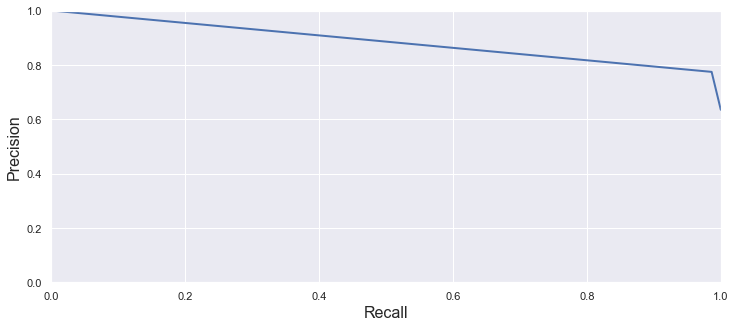

In [68]:
plot_precision_vs_recall(precisions, recalls, on_perc=False)

> **⁉**: Given our final outcome, we can conclude our model is highly sensitive (high recall). Given the dataset, do you agree this s what we need?

> **🛠**: Understanding the [trade-off between precision and recall](https://www.kaggle.com/ganiyuolalekan/precision-recall-trade-off), adjust the model to have an 80% precision (which would reduce the recall rate to about 80% as well), making the model more precise and less sensitive.

That concludes the model fine-tuning. ✔

We've successfully prepared the dataset, shortlisted models and elected the best performing models, and finally fine-tuned the system. But this isn't enough to take the system to production. 

We need to create a pipeline that addresses the whole process that we have observed. We do this by making use of the `sklearn.pipeline.Pipeline` to create a machine learning pipeline that runs this process of cleaning the dataset, pre-processing it, and making predictions.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


There are some things we need to quickly identify before we transform our columns. Looking at the work we've done from the start we'll be performing a series of encoding on the various feature columns.

1. We'll drop the columns Gender, and Married because we have discovered from our analysis that these columns provide little to no tangible information to our model
2. The next thing we'll do is prepare our column transformer for filling missing values for both continuous and categorical columns. We'll be filling the continuous columns with the mean values and the categorical columns with the mode values.
3. We'll also be scaling all continuous columns and transforming all categorical columns.

In [70]:
drop_columns = ['Gender', 'Married']

continuous_columns = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'
]

categorical_columns = [
    'Loan_Amount_Term', 'Dependents', 'Education', 
    'Self_Employed', 'Credit_History', 'Property_Area'
]

In [71]:
continuous_transformer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer_pipeine = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
])

In [72]:
data_transformer = ColumnTransformer([
    ('drop_col', 'drop', drop_columns),
    ('trans_cont', continuous_transformer_pipeline, continuous_columns),
    ('trans_cat', categorical_transformer_pipeine, categorical_columns),
])

In [73]:
loan_predictor_model_pipeline = Pipeline([
    ('data_transformer', data_transformer),
    ('predictor', grid_search.best_estimator_)
])

In [74]:
loan_dataset = pd.read_csv("data/loan_prediction.csv", index_col='Loan_ID')
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
target_column = 'Loan_Status'

target = loan_dataset[target_column]
data = loan_dataset.drop(target_column, axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.1857, random_state=42)

In [78]:
target_encoder = LabelEncoder()

In [79]:
y_train = target_encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = target_encoder.transform(y_test.to_numpy().reshape(-1, 1))

C:\Users\ganiy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [80]:
loan_predictor_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('drop_col', 'drop',
                                                  ['Gender', 'Married']),
                                                 ('trans_cont',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('trans_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImpu

In [81]:
predictions = loan_predictor_model_pipeline.predict(X_test)

In [82]:
accuracy_score(y_test, predictions)

0.782608695652174

In [83]:
precision_score(y_test, predictions)

0.75

In [84]:
recall_score(y_test, predictions)

0.9863013698630136

> **🛠**: Improve the pipeline we created to better follow the steps from our notebook.

### Conclusion

So that concludes our session on data modeling for classification tasks. I hope you guys have a deeper intuition on what data modeling in machine learning is all about.

There are extra activities for you guys alongside those stated in the black quotes 🛠 👽. This may be more complex based on how proficient you're with the python machine learning tools, so it isn't compulsory everyone submits this as part of their assignments.

1. Exceed our current accuracy using XGBoost (Time consuming, but worth it).
2. Tackle the Titanic dataset. A great place to start is on [Kaggle](https://www.kaggle.com/c/titanic/data).

__Notebook by Ganiyu Olalekan on data modeling in machine learning.__

Follow **Olalekan @**:

- [LinkedIn](https://www.linkedin.com/in/olalekan-ganiyu-747855199/)
- [Twitter](https://twitter.com/GM_Olalekan)
- [Medium](https://gmolalekan.medium.com/)
- [Kaggle](https://www.kaggle.com/ganiyuolalekan)
- [Github](https://github.com/ganiyuolalekan)